In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations. 
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [6]:
# Use the citypy module to determine city based on latitude and longitude
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities =[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [8]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6f1a134139e2ac05bacd17e9ded5dc9b


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the data to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into the city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
# If an error occurs, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | ust-ilimsk
Processing Record 2 of Set 1 | amderma
City not found. Skipping...
Processing Record 3 of Set 1 | cockburn town
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | gasa
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | cayenne
Processing Record 10 of Set 1 | yima
Processing Record 11 of Set 1 | broome
Processing Record 12 of Set 1 | half moon bay
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | kingman
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | ihlow
Processing Record 21 of Set 1 | hof
Processing Record 22 of Set 1 | ishinomaki
Processing Record 23 of Set 1 | hob

Processing Record 38 of Set 4 | huarmey
Processing Record 39 of Set 4 | batagay
Processing Record 40 of Set 4 | toamasina
Processing Record 41 of Set 4 | isangel
Processing Record 42 of Set 4 | shingu
Processing Record 43 of Set 4 | illescas
Processing Record 44 of Set 4 | mizan teferi
Processing Record 45 of Set 4 | carnarvon
Processing Record 46 of Set 4 | kapit
Processing Record 47 of Set 4 | olafsvik
City not found. Skipping...
Processing Record 48 of Set 4 | hovd
Processing Record 49 of Set 4 | saint-francois
Processing Record 50 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 1 of Set 5 | kavieng
Processing Record 2 of Set 5 | salamiyah
Processing Record 3 of Set 5 | trairi
Processing Record 4 of Set 5 | devli
Processing Record 5 of Set 5 | tuktoyaktuk
Processing Record 6 of Set 5 | caraballeda
Processing Record 7 of Set 5 | beringovskiy
Processing Record 8 of Set 5 | pacific grove
Processing Record 9 of Set 5 | taoudenni
Processing Record 10 of Set 5 | ime

Processing Record 23 of Set 8 | la paz
Processing Record 24 of Set 8 | yar-sale
Processing Record 25 of Set 8 | kuche
City not found. Skipping...
Processing Record 26 of Set 8 | alyangula
Processing Record 27 of Set 8 | vuktyl
Processing Record 28 of Set 8 | bani walid
Processing Record 29 of Set 8 | chara
Processing Record 30 of Set 8 | korla
City not found. Skipping...
Processing Record 31 of Set 8 | brae
Processing Record 32 of Set 8 | benito juarez
Processing Record 33 of Set 8 | hamilton
Processing Record 34 of Set 8 | ayan
Processing Record 35 of Set 8 | antalaha
Processing Record 36 of Set 8 | muros
Processing Record 37 of Set 8 | poum
Processing Record 38 of Set 8 | vila velha
Processing Record 39 of Set 8 | bozoum
Processing Record 40 of Set 8 | namibe
Processing Record 41 of Set 8 | vardo
Processing Record 42 of Set 8 | tayoltita
Processing Record 43 of Set 8 | dinhata
Processing Record 44 of Set 8 | horsham
Processing Record 45 of Set 8 | longyearbyen
Processing Record 46 of

Processing Record 14 of Set 12 | naumburg
Processing Record 15 of Set 12 | tigil
Processing Record 16 of Set 12 | dubna
Processing Record 17 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 18 of Set 12 | torva
Processing Record 19 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 20 of Set 12 | nantucket
Processing Record 21 of Set 12 | traverse city
Processing Record 22 of Set 12 | uri
Processing Record 23 of Set 12 | ipixuna
Processing Record 24 of Set 12 | ahipara
Processing Record 25 of Set 12 | zhezkazgan
Processing Record 26 of Set 12 | minas
Processing Record 27 of Set 12 | pingzhuang
City not found. Skipping...
Processing Record 28 of Set 12 | smidovich
Processing Record 29 of Set 12 | gornyye klyuchi
Processing Record 30 of Set 12 | dingle
Processing Record 31 of Set 12 | seoul
Processing Record 32 of Set 12 | dubbo
Processing Record 33 of Set 12 | lake charles
Processing Record 34 of Set 12 | amahai
Processing Record 35 of Set 12 | maragog

In [12]:
len(city_data)

556

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ust-Ilimsk,57.96,102.73,17.47,93,97,8.63,RU,2020-01-04 20:06:18
1,Cockburn Town,21.46,-71.14,80.60,69,40,11.41,TC,2020-01-04 20:05:35
2,Albany,42.65,-73.75,42.80,86,90,6.93,US,2020-01-04 20:05:03
3,Ushuaia,-54.81,-68.31,57.20,41,40,5.82,AR,2020-01-04 20:03:55
4,Gasa,27.91,89.73,2.66,98,98,7.29,BT,2020-01-04 20:06:19
5,Barrow,-38.31,-60.23,77.27,55,75,18.05,AR,2020-01-04 20:06:19
6,Hilo,19.71,-155.08,75.20,73,40,3.36,US,2020-01-04 20:05:13
7,Cayenne,4.94,-52.33,84.20,70,75,9.17,GF,2020-01-04 20:06:20
8,Yima,34.75,111.87,37.58,95,100,14.36,CN,2020-01-04 20:06:20
9,Broome,52.47,1.45,46.00,87,40,6.93,GB,2020-01-04 20:06:20


In [14]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ust-Ilimsk,RU,2020-01-04 20:06:18,57.96,102.73,17.47,93,97,8.63
1,Cockburn Town,TC,2020-01-04 20:05:35,21.46,-71.14,80.60,69,40,11.41
2,Albany,US,2020-01-04 20:05:03,42.65,-73.75,42.80,86,90,6.93
3,Ushuaia,AR,2020-01-04 20:03:55,-54.81,-68.31,57.20,41,40,5.82
4,Gasa,BT,2020-01-04 20:06:19,27.91,89.73,2.66,98,98,7.29
5,Barrow,AR,2020-01-04 20:06:19,-38.31,-60.23,77.27,55,75,18.05
6,Hilo,US,2020-01-04 20:05:13,19.71,-155.08,75.20,73,40,3.36
7,Cayenne,GF,2020-01-04 20:06:20,4.94,-52.33,84.20,70,75,9.17
8,Yima,CN,2020-01-04 20:06:20,34.75,111.87,37.58,95,100,14.36
9,Broome,GB,2020-01-04 20:06:20,52.47,1.45,46.00,87,40,6.93


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
import time

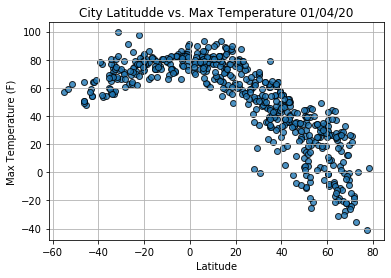

In [20]:
# Build the scatter plot  for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other grapg properties.
plt.title(f"City Latitudde vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

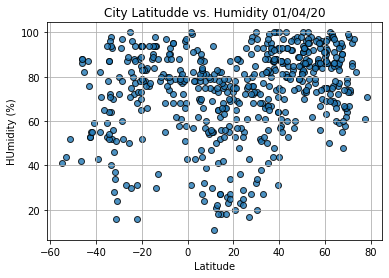

In [21]:
# Build the scatter plot  for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other grapg properties.
plt.title(f"City Latitudde vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

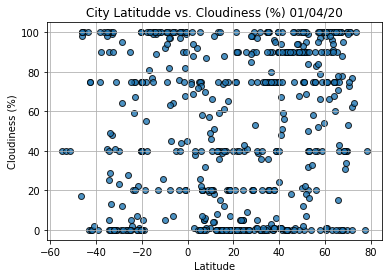

In [22]:
# Build the scatter plot  for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other grapg properties.
plt.title(f"City Latitudde vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

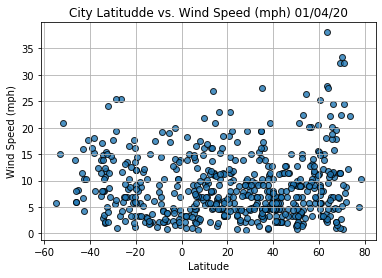

In [23]:
# Build the scatter plot  for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other grapg properties.
plt.title(f"City Latitudde vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [26]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [88]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [89]:
index13 = city_data_df.loc[13]
index13

City                    Saskylakh
Country                        RU
Date          2020-01-04 20:06:21
Lat                         71.97
Lng                        114.09
Max Temp                   -21.41
Humidity                       95
Cloudiness                     62
Wind Speed                   6.04
Name: 13, dtype: object

In [90]:
 city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
551     True
552     True
553    False
554     True
555     True
Name: Lat, Length: 556, dtype: bool

In [91]:
city_data_df[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ust-Ilimsk,RU,2020-01-04 20:06:18,57.96,102.73,17.47,93,97,8.63
1,Cockburn Town,TC,2020-01-04 20:05:35,21.46,-71.14,80.60,69,40,11.41
2,Albany,US,2020-01-04 20:05:03,42.65,-73.75,42.80,86,90,6.93
4,Gasa,BT,2020-01-04 20:06:19,27.91,89.73,2.66,98,98,7.29
6,Hilo,US,2020-01-04 20:05:13,19.71,-155.08,75.20,73,40,3.36


In [92]:
# Create Northern and Southern Hemisphere DataFrame.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [93]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ust-Ilimsk,RU,2020-01-04 20:06:18,57.96,102.73,17.47,93,97,8.63
1,Cockburn Town,TC,2020-01-04 20:05:35,21.46,-71.14,80.60,69,40,11.41
2,Albany,US,2020-01-04 20:05:03,42.65,-73.75,42.80,86,90,6.93
4,Gasa,BT,2020-01-04 20:06:19,27.91,89.73,2.66,98,98,7.29
6,Hilo,US,2020-01-04 20:05:13,19.71,-155.08,75.20,73,40,3.36


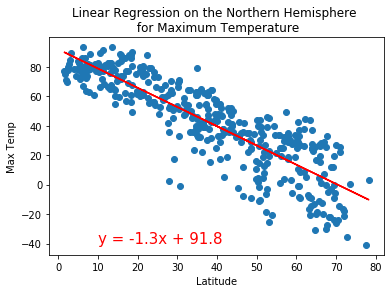

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (10,-40))

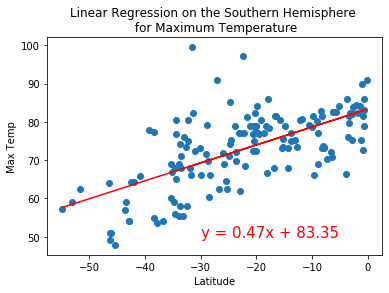

In [96]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-30,50))

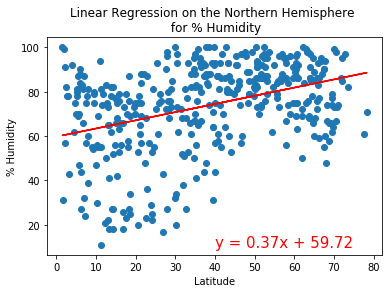

In [97]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(40,10))

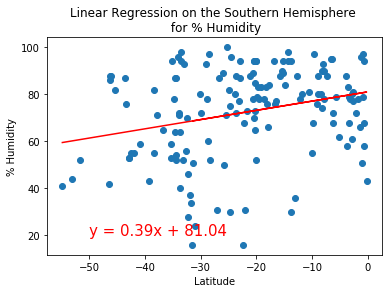

In [98]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-50,20))

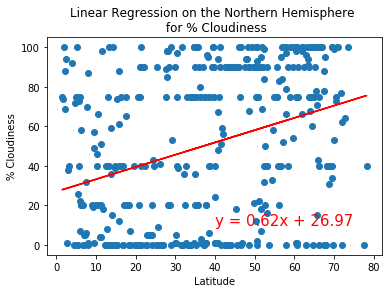

In [99]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(40,10))

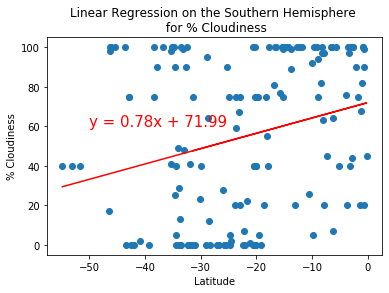

In [101]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-50,60))

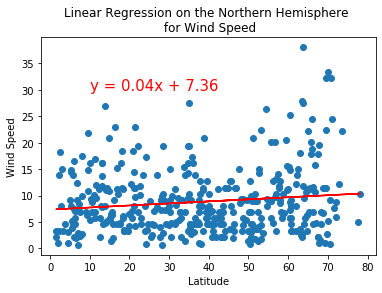

In [103]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(10,30))

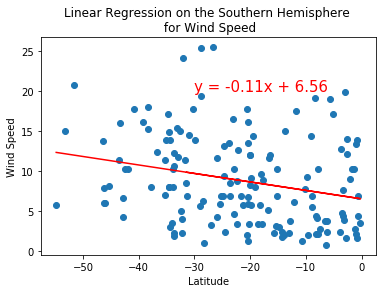

In [107]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-30,20))